In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose
import time

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()

dataset_train = pd.read_csv("~/Documents/Datasets/ML/fifa-processed-train.csv")
dataset_test = pd.read_csv("~/Documents/Datasets/ML/fifa-processed-test.csv")

X_train = dataset_train[['Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
y_train = dataset_train['position_label']
X_test = dataset_test[['Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
y_test = dataset_test['position_label']

In [94]:
# Scaler to transform input data since NNs are sensitive to attributes
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
one_hot = OneHotEncoder(categories='auto')
le = LabelEncoder()
y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

In [124]:
def plot_acc_iters(iterations, train_accuracy, test_accuracy):
    plt.figure()
    plt.title("NN Weight Optimization")
    plt.xlabel("Maximum Iterations")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.plot(iterations, train_accuracy, 'o-', color="r",label="Train")
    plt.plot(iterations, test_accuracy, 'o-', color="g",label="Test")
    plt.legend(loc="best")
    return plt

def plot_acc_time(iterations, train_accuracy, test_accuracy):
    plt.figure()
    plt.title("NN Weight Optimization")
    plt.xlabel("Time")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.plot(iterations, train_accuracy, 'o-', color="r",label="Train")
    # plt.plot(iterations, test_accuracy, 'o-', color="g",label="Test")
    plt.legend(loc="best")
    return plt

In [127]:
def plot_cumTime(time_train_rhc, time_test_rhc, time_train_simA, time_test_simA, time_train_ga, time_test_ga, train_accuracy_rhc, test_accuracy_rhc, train_accuracy_simA, test_accuracy_simA, train_accuracy_ga, test_accuracy_ga):
    plt.figure()
    plt.title("Algorithm Comparison")
    plt.xlabel("Time")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.plot(time_train_rhc, train_accuracy_rhc, 'o-', color="r",label="RHC Train")
    plt.plot(time_train_simA, train_accuracy_simA, 'o-', color="g",label="SimA Train")
    plt.plot(time_train_ga, train_accuracy_ga, 'o-', color="b",label="GA Train")
    # plt.plot(iterations, test_accuracy, 'o-', color="g",label="Test")
    plt.legend(loc="best")
    return plt

In [117]:
# RHC for ANN FIFA

np.random.seed(3)

no_of_iterations = [10,20,50,100,200,500,1000,2000,4000,5000,6000,8000,10000]
time_for_iteration_train = []
time_for_iteration_test = []
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [50], activation = 'relu', 
                                    algorithm = 'random_hill_climb', max_iters = i, 
                                    is_classifier = True, learning_rate = 0.5, bias = True,
                                    early_stopping = False, max_attempts = 50)
    
    nn_model.fit(X_train, y_train_hot)
    time_for_iteration_train.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_for_iteration_test.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_error.append(y_train_error)
    test_error.append(y_test_error)
    train_accuracy.append(y_train_accuracy)
    test_accuracy.append(y_test_accuracy)
    
print(time_for_iteration_train)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  4000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
iteration:  6000
Predicting training data
Predicting testing data
iteration:  8000
Predicting training data
Predicting testing data
iteration:  10000
Predicting training data
Predicting testing data
[0.3095228672027588, 0.5823891162872314, 1.6340599060058594, 2.9430060386657715, 5.249964714050293, 12.19038701057434, 24.29261589050293, 46.210166931

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

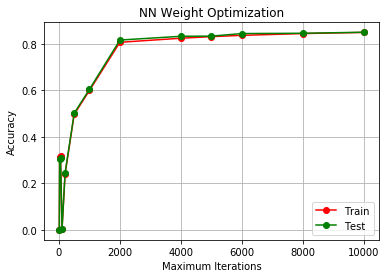

In [118]:
plot_acc_iters(no_of_iterations, train_accuracy, test_accuracy)

In [119]:
# SimA for FIFA

np.random.seed(3)

no_of_iterations = [10,20,50,100,200,500,1000,2000,4000,5000,6000,8000,10000]
time_for_iteration_train = []
time_for_iteration_test = []
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'simulated_annealing', max_iters = i, 
                                    is_classifier = True, learning_rate = 0.5, 
                                    early_stopping = False, max_attempts = 100)
    
    nn_model.fit(X_train, y_train_hot)
    time_for_iteration_train.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_for_iteration_test.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_error.append(y_train_error)
    test_error.append(y_test_error)
    train_accuracy.append(y_train_accuracy)
    test_accuracy.append(y_test_accuracy)
    
print(time_for_iteration_train)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  4000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
iteration:  6000
Predicting training data
Predicting testing data
iteration:  8000
Predicting training data
Predicting testing data
iteration:  10000
Predicting training data
Predicting testing data
[0.4835379123687744, 0.5425667762756348, 1.3776230812072754, 2.460318088531494, 5.255506992340088, 12.428493976593018, 21.672182083129883, 43.28191900

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

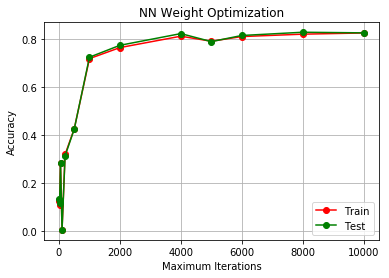

In [132]:
plot_acc_iters(no_of_iterations, train_accuracy, test_accuracy)

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

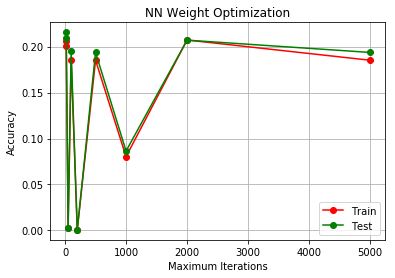

In [81]:
plot_acc_iters(no_of_iterations, train_accuracy, test_accuracy)

In [105]:
# GenAlg for FIFA

np.random.seed(3)

no_of_iterations = [10,20,50,100,200,500,1000,2000,5000]
time_for_iteration_train = []
time_for_iteration_test = []
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'genetic_alg', max_iters = i, pop_size = 100,
                                    is_classifier = True, learning_rate = 0.5, clip_max = 1,
                                    early_stopping = True, max_attempts = 100)
    
    nn_model.fit(X_train, y_train_hot)
    time_for_iteration_train.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_for_iteration_test.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_error.append(y_train_error)
    test_error.append(y_test_error)
    train_accuracy.append(y_train_accuracy)
    test_accuracy.append(y_test_accuracy)
    
print(time_for_iteration_train)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
[16.33250880241394, 33.38378596305847, 80.17433094978333, 163.1932339668274, 320.2522921562195, 158.35445022583008, 310.54130005836487, 257.86226320266724, 172.0941879749298]


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

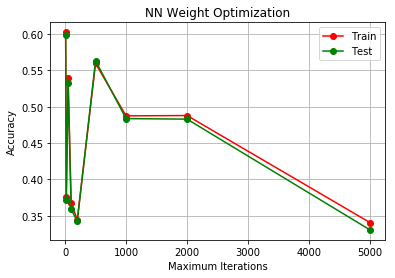

In [106]:
plot_acc_iters(no_of_iterations, train_accuracy, test_accuracy)

In [115]:
# GenAlg for FIFA

np.random.seed(3)

no_of_iterations = [10,20,50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
time_for_iteration_train = []
time_for_iteration_test = []
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'genetic_alg', max_iters = i, pop_size = 200, mutation_prob = 0.25,
                                    is_classifier = True, learning_rate = 0.5, clip_max = 1,
                                    early_stopping = True, max_attempts = 10)
    
    nn_model.fit(X_train, y_train_hot)
    time_for_iteration_train.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_for_iteration_test.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_error.append(y_train_error)
    test_error.append(y_test_error)
    train_accuracy.append(y_train_accuracy)
    test_accuracy.append(y_test_accuracy)
    
print(time_for_iteration_train)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  150
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  250
Predicting training data
Predicting testing data
iteration:  300
Predicting training data
Predicting testing data
iteration:  350
Predicting training data
Predicting testing data
iteration:  400
Predicting training data
Predicting testing data
iteration:  450
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  600
Predicting training data
Predicting testing data
iteration:  700
Predicting training data
Predicting testing data
iteration:  800
Predicting training data
Predicting testing data
iteration:  900
Predicting t

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

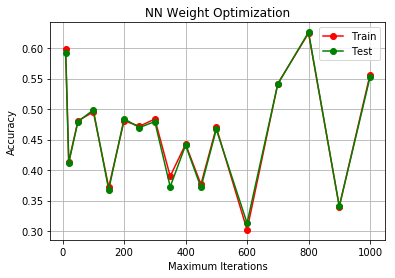

In [116]:
plot_acc_iters(no_of_iterations, train_accuracy, test_accuracy)

In [128]:
## RHC NN, many iterations
np.random.seed(3)

no_of_iterations = [10,20,50,100,200,500,1000,2000,4000,5000,6000,8000,10000]
time_train_rhc = []
time_test_rhc = []
train_accuracy_rhc = []
test_accuracy_rhc = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'random_hill_climb', max_iters = i, 
                                    is_classifier = True, learning_rate = 0.2, bias = True,
                                    early_stopping = False, max_attempts = 50)
    
    nn_model.fit(X_train, y_train_hot)
    time_train_rhc.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_test_rhc.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_accuracy_rhc.append(y_train_accuracy)
    test_accuracy_rhc.append(y_test_accuracy)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  4000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
iteration:  6000
Predicting training data
Predicting testing data
iteration:  8000
Predicting training data
Predicting testing data
iteration:  10000
Predicting training data
Predicting testing data


In [129]:
# SimA NN, many iterations
time_train_simA = []
time_test_simA = []
train_accuracy_simA = []
test_accuracy_simA = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'simulated_annealing', max_iters = i, 
                                    is_classifier = True, learning_rate = 0.5,
                                    early_stopping = False, max_attempts = 50)
    
    nn_model.fit(X_train, y_train_hot)
    time_train_simA.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_test_simA.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_accuracy_simA.append(y_train_accuracy)
    test_accuracy_simA.append(y_test_accuracy)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  4000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
iteration:  6000
Predicting training data
Predicting testing data
iteration:  8000
Predicting training data
Predicting testing data
iteration:  10000
Predicting training data
Predicting testing data


In [130]:
# GA NN, many iterations
time_train_ga = []
time_test_ga = []
train_accuracy_ga = []
test_accuracy_ga = []

for i in no_of_iterations:
    start_time_train = time.time()
    print("iteration: ", i)
    nn_model = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu', 
                                    algorithm = 'genetic_alg', max_iters = i, pop_size = 200, mutation_prob = 0.25,
                                    is_classifier = True, learning_rate = 0.5, clip_max = 1,
                                    early_stopping = True, max_attempts = 10)
    
    nn_model.fit(X_train, y_train_hot)
    time_train_ga.append(time.time() - start_time_train)
    
    print("Predicting training data")
    y_train_pred = nn_model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_train_error = mean_squared_error(y_train_hot, y_train_pred)
    
    print("Predicting testing data")
    start_time_test = time.time()
    y_test_pred = nn_model.predict(X_test)
    time_test_ga.append(time.time() - start_time_test)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    y_test_error = mean_squared_error(y_test_hot, y_test_pred)
    
    train_accuracy_ga.append(y_train_accuracy)
    test_accuracy_ga.append(y_test_accuracy)

iteration:  10
Predicting training data
Predicting testing data
iteration:  20
Predicting training data
Predicting testing data
iteration:  50
Predicting training data
Predicting testing data
iteration:  100
Predicting training data
Predicting testing data
iteration:  200
Predicting training data
Predicting testing data
iteration:  500
Predicting training data
Predicting testing data
iteration:  1000
Predicting training data
Predicting testing data
iteration:  2000
Predicting training data
Predicting testing data
iteration:  4000
Predicting training data
Predicting testing data
iteration:  5000
Predicting training data
Predicting testing data
iteration:  6000
Predicting training data
Predicting testing data
iteration:  8000
Predicting training data
Predicting testing data
iteration:  10000
Predicting training data
Predicting testing data


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

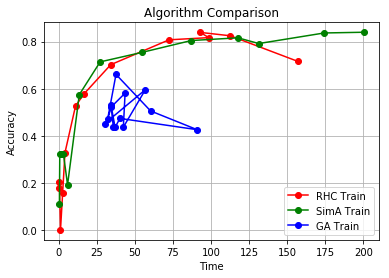

In [131]:
plot_cumTime(time_train_rhc, time_test_rhc, time_train_simA, time_test_simA, time_train_ga, time_test_ga, train_accuracy_rhc, test_accuracy_rhc, train_accuracy_simA, test_accuracy_simA, train_accuracy_ga, test_accuracy_ga)

In [ ]:
# ---------------------------------------------------------------------------------------

In [64]:
## THIS IS REALLY OLD, TEST CODE

np.random.seed(3)

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu',
                                 algorithm = 'random_hill_climb', max_iters = 10000,
                                 is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

# nn_model1.fit(X_train, y_train_hot)

1551547533.112354
in iteration:  1
in iteration:  2
in iteration:  3
in iteration:  4
in iteration:  5
in iteration:  6
in iteration:  7
in iteration:  8
in iteration:  9
in iteration:  10
time for execution is: 1290.4336829185486


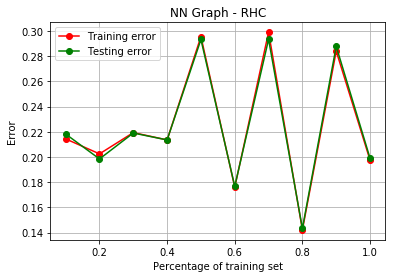

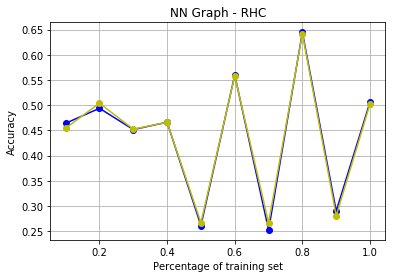

In [65]:
def plot_final_curve_rhc():
    plt.figure()
    plt.title("NN Graph - RHC")
    plt.xlabel("Percentage of training set")
    plt.ylabel("Error")
    plt.grid()
    
    x_axis_values = []
    y_train_error_graph = []
    y_test_error_graph = []
    y_train_accuracy_graph = []
    y_test_accuracy_graph = []
    
    for i in range(1,11):
        print ("in iteration: ", i)
        X_train_selected = X_train[0:int((i/10)*len(X_train))]
        y_train_selected = y_train_hot[0:int((i/10)*len(y_train))]
        nn_model1.fit(X_train_selected, y_train_selected)

        y_train_pred = nn_model1.predict(X_train)
        y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
        y_train_error = mean_squared_error(y_train_hot, y_train_pred)

        y_test_pred = nn_model1.predict(X_test)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        y_test_error = mean_squared_error(y_test_hot, y_test_pred)

        x_axis_values.append(i/10)
        y_train_error_graph.append(y_train_error)
        y_test_error_graph.append(y_test_error)
        y_train_accuracy_graph.append(y_train_accuracy)
        y_test_accuracy_graph.append(y_test_accuracy)
    
    plt.plot(x_axis_values, y_train_error_graph, 'o-', color="r",label="Training error")
    plt.plot(x_axis_values, y_test_error_graph, 'o-', color="g",label="Testing error")
    plt.legend(loc="best")
    plt.figure()
    plt.title("NN Graph - RHC")
    plt.xlabel("Percentage of training set")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(x_axis_values, y_train_accuracy_graph, 'o-', color="b",label="Training accuracy")
    plt.plot(x_axis_values, y_test_accuracy_graph, 'o-', color="y",label="Testing accuracy")

start_time = time.time()
print(start_time)
plot_final_curve_rhc()
end_time = time.time()
print("time for execution is:", end_time - start_time)
#print(X_train[0])

In [38]:
np.random.seed(3)

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000, pop_size = 500, mutation_prob = 0.1,
                                 bias = False, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 500)

1551416999.384029
in iteration:  1
in iteration:  2
in iteration:  3
in iteration:  4
in iteration:  5
in iteration:  6
in iteration:  7
in iteration:  8
in iteration:  9
in iteration:  10
time for execution is: 29524.89442205429


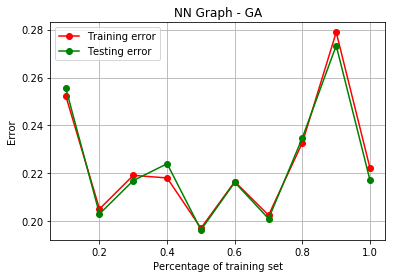

In [43]:
def plot_final_curve_GA():
    plt.figure()
    plt.title("NN Graph - GA")
    plt.xlabel("Percentage of training set")
    plt.ylabel("Error")
    plt.grid()
    
    x_axis_values = []
    y_train_error_graph = []
    y_test_error_graph = []
    y_train_accuracy_graph = []
    y_test_accuracy_graph = []
    
    for i in range(1,11):
        print("in iteration: ", i)
        X_train_selected = X_train[0:int((i/10)*len(X_train))]
        y_train_selected = y_train_hot[0:int((i/10)*len(y_train))]
        nn_model2.fit(X_train_selected, y_train_selected)

        y_train_pred = nn_model2.predict(X_train)
        y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
        y_train_error = mean_squared_error(y_train_hot, y_train_pred)

        y_test_pred = nn_model2.predict(X_test)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        y_test_error = mean_squared_error(y_test_hot, y_test_pred)

        x_axis_values.append(i/10)
        y_train_error_graph.append(y_train_error)
        y_test_error_graph.append(y_test_error)
        y_train_accuracy_graph.append(y_train_accuracy)
        y_test_accuracy_graph.append(y_test_accuracy)
    
    plt.plot(x_axis_values, y_train_error_graph, 'o-', color="r",label="Training error")
    plt.plot(x_axis_values, y_test_error_graph, 'o-', color="g",label="Testing error")
    plt.legend(loc="best")
    
    # plt.plot(x_axis_values, y_train_accuracy_graph, 'o-', color="b",label="Training accuracy")
    # plt.plot(x_axis_values, y_test_accuracy_graph, 'o-', color="y",label="Testing accuracy")
start_time = time.time()
print(start_time)
plot_final_curve_GA()
end_time = time.time()
print("time for execution is:", end_time - start_time)


In [50]:
np.random.seed(3)

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000, pop_size = 200, mutation_prob = 0.1,
                                 bias = False, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

1551457073.283626
in iteration:  1
time for iteration is: 59.55146598815918
in iteration:  2
time for iteration is: 185.25662088394165
in iteration:  3
time for iteration is: 297.7961518764496
in iteration:  4
time for iteration is: 550.9148259162903
in iteration:  5
time for iteration is: 744.1499450206757
in iteration:  6
time for iteration is: 1136.828068971634
in iteration:  7
time for iteration is: 1416.840393781662
in iteration:  8
time for iteration is: 1980.5737359523773
in iteration:  9
time for iteration is: 2298.1987907886505
in iteration:  10
time for iteration is: 2868.268618822098
time for execution is: 2868.291386127472


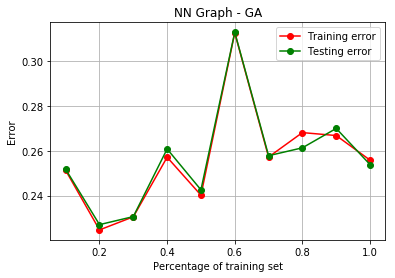

In [52]:
start_time = time.time()
print(start_time)
def plot_final_curve_GA():
    plt.figure()
    plt.title("NN Graph - GA")
    plt.xlabel("Percentage of training set")
    plt.ylabel("Error")
    plt.grid()
    
    x_axis_values = []
    y_train_error_graph = []
    y_test_error_graph = []
    y_train_accuracy_graph = []
    y_test_accuracy_graph = []
    
    for i in range(1,11):
        print("in iteration: ", i)
        X_train_selected = X_train[0:int((i/10)*len(X_train))]
        y_train_selected = y_train_hot[0:int((i/10)*len(y_train))]
        nn_model2.fit(X_train_selected, y_train_selected)

        y_train_pred = nn_model2.predict(X_train)
        y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
        y_train_error = mean_squared_error(y_train_hot, y_train_pred)

        y_test_pred = nn_model2.predict(X_test)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        y_test_error = mean_squared_error(y_test_hot, y_test_pred)

        x_axis_values.append(i/10)
        y_train_error_graph.append(y_train_error)
        y_test_error_graph.append(y_test_error)
        y_train_accuracy_graph.append(y_train_accuracy)
        y_test_accuracy_graph.append(y_test_accuracy)
        print("time for iteration is:", time.time() - start_time)
    
    plt.plot(x_axis_values, y_train_error_graph, 'o-', color="r",label="Training error")
    plt.plot(x_axis_values, y_test_error_graph, 'o-', color="g",label="Testing error")
    plt.legend(loc="best")
    
    # plt.plot(x_axis_values, y_train_accuracy_graph, 'o-', color="b",label="Training accuracy")
    # plt.plot(x_axis_values, y_test_accuracy_graph, 'o-', color="y",label="Testing accuracy")

plot_final_curve_GA()
end_time = time.time()
print("time for execution is:", end_time - start_time)


In [54]:
np.random.seed(3)

nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [10,10,10], activation = 'relu',
                                 algorithm = 'simulated_annealing', max_iters = 10000, schedule = mlrose.ExpDecay(),
                                 bias = False, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 100)

1551473073.900457
in iteration:  1
time for iteration is: 53.04947209358215
in iteration:  2
time for iteration is: 140.65413808822632
in iteration:  3
time for iteration is: 266.3517529964447
in iteration:  4
time for iteration is: 420.85163021087646
in iteration:  5
time for iteration is: 602.66228723526
in iteration:  6
time for iteration is: 834.5208871364594
in iteration:  7
time for iteration is: 1072.901927947998
in iteration:  8
time for iteration is: 1322.2251782417297
in iteration:  9
time for iteration is: 1631.689397096634
in iteration:  10
time for iteration is: 1990.7333612442017
time for execution is: 1990.7900910377502


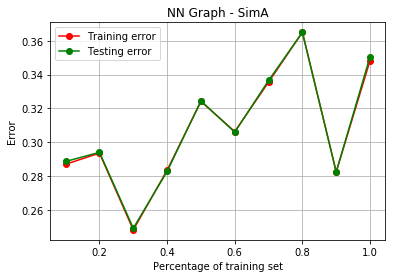

In [55]:
start_time = time.time()
print(start_time)
def plot_final_curve_SimA():
    plt.figure()
    plt.title("NN Graph - SimA")
    plt.xlabel("Percentage of training set")
    plt.ylabel("Error")
    plt.grid()
    
    x_axis_values = []
    y_train_error_graph = []
    y_test_error_graph = []
    y_train_accuracy_graph = []
    y_test_accuracy_graph = []
    
    for i in range(1,11):
        print("in iteration: ", i)
        X_train_selected = X_train[0:int((i/10)*len(X_train))]
        y_train_selected = y_train_hot[0:int((i/10)*len(y_train))]
        nn_model3.fit(X_train_selected, y_train_selected)

        y_train_pred = nn_model3.predict(X_train)
        y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
        y_train_error = mean_squared_error(y_train_hot, y_train_pred)

        y_test_pred = nn_model3.predict(X_test)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        y_test_error = mean_squared_error(y_test_hot, y_test_pred)

        x_axis_values.append(i/10)
        y_train_error_graph.append(y_train_error)
        y_test_error_graph.append(y_test_error)
        y_train_accuracy_graph.append(y_train_accuracy)
        y_test_accuracy_graph.append(y_test_accuracy)
        print("time for iteration is:", time.time() - start_time)
    
    plt.plot(x_axis_values, y_train_error_graph, 'o-', color="r",label="Training error")
    plt.plot(x_axis_values, y_test_error_graph, 'o-', color="g",label="Testing error")
    plt.legend(loc="best")
    
    # plt.plot(x_axis_values, y_train_accuracy_graph, 'o-', color="b",label="Training accuracy")
    # plt.plot(x_axis_values, y_test_accuracy_graph, 'o-', color="y",label="Testing accuracy")

plot_final_curve_SimA()
end_time = time.time()
print("time for execution is:", end_time - start_time)